In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Restaurant_Reviews.tsv', sep = '\t')

In [4]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
data.shape

(1000, 2)

In [7]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [8]:
data['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [10]:
data['char_count'] = data['Review'].apply(len)
data.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [12]:
data['word_count'] = data['Review'].apply(lambda x : len(str(x).split(' ')))
data.head()

,Review,Liked,char_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [13]:
import nltk

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\haode\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [15]:
data['sent_count'] = data['Review'].apply(lambda x : len(nltk.sent_tokenize(str(x))))
data.head()

,Review,Liked,char_count,word_count,sent_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [16]:
data[data['Liked']==1]['char_count'].mean()

55.88

In [17]:
data[data['Liked']==0]['char_count'].mean()

60.75

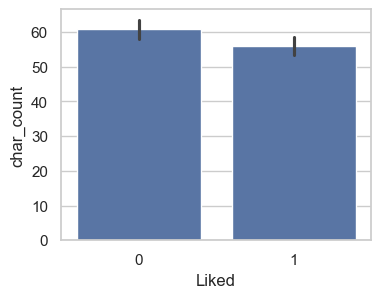

In [23]:
import seaborn as sns
sns.set_theme(style="whitegrid", rc={'figure.figsize':(4,3)})
ax = sns.barplot(x="Liked", y="char_count", data=data)


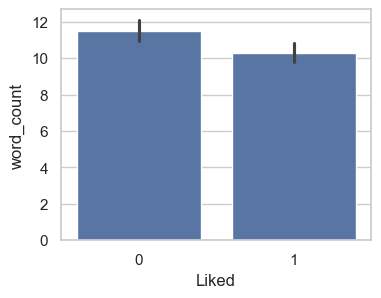

In [24]:
import seaborn as sns
sns.set_theme(style="whitegrid", rc={'figure.figsize':(4,3)})
ax = sns.barplot(x="Liked", y="word_count", data=data)

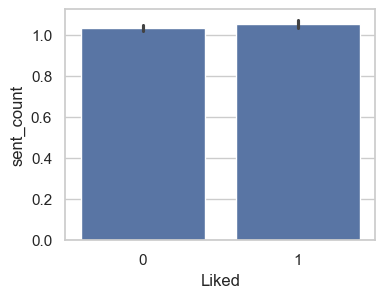

In [25]:
import seaborn as sns
sns.set_theme(style="whitegrid", rc={'figure.figsize':(4,3)})
ax = sns.barplot(x="Liked", y="sent_count", data=data)

In [26]:
import re

In [27]:
# remove non alphabet characters
re.sub('[^a-zA-Z]', ' ', data['Review'][0])

'Wow    Loved this place '

In [28]:
review = re.sub('[^a-zA-Z]', ' ', data['Review'][0])
review = review.lower()
review = review.split()
review

['wow', 'loved', 'this', 'place']

In [34]:
from nltk.corpus import stopwords

In [36]:
nltk.download('stopwords')
all_stopwords = stopwords.words("english")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haode\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [38]:
all_stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [44]:
len(all_stopwords)

179

In [42]:
#remove all the stopwords from the review
review = [word for word in review if word not in set(all_stopwords)] # using set is faster than list

In [43]:
review

['wow', 'loved', 'place']

In [45]:
'''
In general, stopwords can be removed to improve the performance of the model.
However, in our case, it is not always true.
For example, not is in stopwords. But 'not good' is very different from 'good'.
Hence, not shouldn't be removed 
'''

"\nIn general, stopwords can be removed to improve the performance of the model.\nHowever, in our case, it is not always true.\nFor example, not is in stopwords. But 'not good' is very different from 'good'.\nHence, not shouldn't be removed \n"

In [51]:
# We are going to remove 'not' from the stopwords resource
all_stopwords = stopwords.words("english")
all_stopwords.remove('not')

review = re.sub('[^a-zA-Z]', ' ', data['Review'][1])
print(review)
review = review.lower()
review = review.split()
review = [word for word in review if word not in set(all_stopwords)] # using set is faster than list
print(review)

Crust is not good 
['crust', 'not', 'good']


In [52]:
from nltk.stem.porter import PorterStemmer

In [53]:
ps = PorterStemmer()

In [55]:
review = [ps.stem(word) for word in review]
review = ' '.join(review)
review

'crust not good'

In [57]:
import re
custom_stopwords = {'don', "don't", 'ain', "aren't", 'couldn', "couldn't",
                    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                    'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                    'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
corpus = []
ps = PorterStemmer()
stop_words = set(stopwords.words("english")) - custom_stopwords
for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stop_words)] # using set is faster than list
    review = ' '.join(review)
    corpus.append(review)

In [58]:
data['processed_text'] = corpus

In [59]:
data.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [62]:
from wordcloud import WordCloud

In [63]:
wc = WordCloud(width=500, height=500, min_font_size=8, background_color="white")

In [65]:
data[data['Liked']==1]['processed_text']

0                                         wow love place
3      stop late may bank holiday rick steve recommen...
4                                select menu great price
8                                              fri great
9                                            great touch
                             ...                        
899                                  overal great experi
901    regular toast bread equal satisfi occasion pat...
907                                        chip sal amaz
909                             new fav vega buffet spot
922    everi time eat see care teamwork profession degre
Name: processed_text, Length: 500, dtype: object

In [66]:
data[data['Liked']==1]['processed_text'].str.cat(sep=' ')

'wow love place stop late may bank holiday rick steve recommend love select menu great price fri great great touch servic prompt tri cape cod ravoli chicken cranberri mmmm highli recommend food amaz servic also cute could care less interior beauti perform right red velvet cake ohhh stuff good hole wall great mexican street taco friendli staff also combo like burger fri beer decent deal found place accid could not happier overal like place lot redeem qualiti restaur inexpens ampl portion good price first visit hiro delight shrimp tender moist posit note server attent provid great servic thing like prime rib dessert section burger good beef cook right want sandwich go firehous side greek salad greek dress tasti pita hummu refresh order duck rare pink tender insid nice char outsid came run us realiz husband left sunglass tabl chow mein good portion huge love friendli server great food wonder imagin menu salad right amount sauc not power scallop perfectli cook place receiv star appet cockt

In [67]:
wc.generate(data[data['Liked']==1]['processed_text'].str.cat(sep=' '))

In [68]:
pos = wc.generate(data[data['Liked']==1]['processed_text'].str.cat(sep=' '))

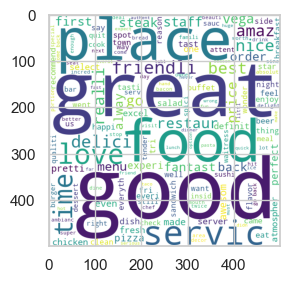

In [69]:
plt.imshow(pos)

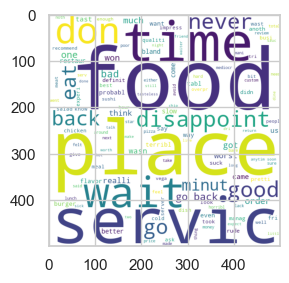

In [70]:
neg = wc.generate(data[data['Liked']==0]['processed_text'].str.cat(sep=' '))
plt.imshow(neg)

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
cv = CountVectorizer(max_features=1500)

In [73]:
cv.fit_transform(corpus)

<1000x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 5513 stored elements in Compressed Sparse Row format>

In [74]:
X = cv.fit_transform(corpus).toarray()
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [75]:
X.shape

(1000, 1500)

In [76]:
y = data['Liked']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(y_test, y_pred)

0.69

In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.825

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.825

In [85]:
import joblib

In [86]:
joblib.dump(rf, "Restaurant_review_model")

['Restaurant_review_model']